<a href="https://colab.research.google.com/github/marayyy/Guvi-Tasks/blob/main/Takehome_user_engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data is available as two attached CSV files:

takehome_user_engagement. csv

takehome_users . csv

The data has the following two tables:

1] A user table ( "takehome_users" ) with data on 12,000 users who signed up for the product in the last two years.

 This table includes:

● name: the user's name

● object_id: the user's id

● email: email address

● creation_source: how their account was created. This takes on one
of 5 values:

  ○ PERSONAL_PROJECTS: invited to join another user's
  personal workspace

  ○ GUEST_INVITE: invited to an organization as a guest
  (limited permissions)

  ○ ORG_INVITE: invited to an organization (as a full member)

  ○ SIGNUP: signed up via the website

  ○ SIGNUP_GOOGLE_AUTH: signed up using Google

Authentication (using a Google email account for their login
id)

● creation_time: when they created their account

● last_session_creation_time: unix timestamp of last login

● opted_in_to_mailing_list: whether they have opted into receiving
marketing emails

● enabled_for_marketing_drip: whether they are on the regular
marketing email drip

● org_id: the organization (group of users) they belong to

● invited_by_user_id: which user invited them to join (if applicable).

2] A usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product.

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period , identify which factors predict future user adoption.

We suggest spending 1­2 hours on this, but you're welcome to spend more or less.

Please send us a brief writeup of your findings (the more concise, the better ­­no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach.

Please note any factors you considered or investigation
you did, even if they did not pan out. Feel free to identify any further research or data

you think would be valuable.

# import neccesary library

In [4]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings
warnings.simplefilter("ignore",UserWarning)

# Read the csv file using pandas

In [6]:
takehome_user_engagement=pd.read_csv("takehome_user_engagement.csv")
takehome_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1.0,1.0
1,2013-11-15 03:45:04,2.0,1.0
2,2013-11-29 03:45:04,2.0,1.0
3,2013-12-09 03:45:04,2.0,1.0
4,2013-12-25 03:45:04,2.0,1.0


In [7]:
#rename the column name so that we can join the two csv file with the common column
takehome_user_engagement.rename(columns={"time_stamp":"creation_time"},inplace=True)

In [8]:
takehome_users=pd.read_csv("takehome_users.csv", encoding='latin1')
takehome_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


# Merging data

In [9]:
take_user=pd.merge(takehome_user_engagement,takehome_users,on="creation_time")
take_user.head(2)

,creation_time,user_id,visited,object_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1.0,1.0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2013-11-15 03:45:04,2.0,1.0,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


# Description of data feature

In [10]:
#checking the shape of the data
take_user.shape

(799, 12)

In [11]:
#checking the datatype of all feature in the take_user
take_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 798
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               799 non-null    object 
 1   user_id                     799 non-null    float64
 2   visited                     799 non-null    float64
 3   object_id                   799 non-null    int64  
 4   name                        799 non-null    object 
 5   email                       799 non-null    object 
 6   creation_source             799 non-null    object 
 7   last_session_creation_time  796 non-null    float64
 8   opted_in_to_mailing_list    799 non-null    int64  
 9   enabled_for_marketing_drip  799 non-null    int64  
 10  org_id                      799 non-null    int64  
 11  invited_by_user_id          440 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 81.1+ KB


In [12]:
#checking the descriptive statistics like mean,count,25%,75%,100%,min,max for the take_user
take_user.describe()

,user_id,visited,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,799.000000,799.0,799.000000,7.960000e+02,799.000000,799.000000,799.000000,440.000000
mean,1153.649562,1.0,1182.871089,1.379821e+09,0.276596,0.187735,145.097622,5874.572727
std,659.222541,0.0,821.849654,1.946340e+07,0.447595,0.390745,124.701319,3477.807478
min,1.000000,1.0,1.000000,1.338673e+09,0.000000,0.000000,0.000000,47.000000
25%,573.000000,1.0,578.000000,1.363526e+09,0.000000,0.000000,31.000000,2689.250000
50%,1153.000000,1.0,1153.000000,1.384444e+09,0.000000,0.000000,113.000000,5743.500000
75%,1718.500000,1.0,1720.500000,1.398875e+09,1.000000,0.000000,241.500000,8951.500000
max,2316.000000,1.0,9557.000000,1.401921e+09,1.000000,1.000000,415.000000,11994.000000


In [13]:
#Now changing the creation time to date timestamp for taking the year,month seperately using pandas datetime function
take_user["creation_time"]=pd.to_datetime(take_user["creation_time"])

In [14]:
#Checking the null value(data is missing or not)
take_user.isna().sum()

creation_time                   0
user_id                         0
visited                         0
object_id                       0
name                            0
email                           0
creation_source                 0
last_session_creation_time      3
opted_in_to_mailing_list        0
enabled_for_marketing_drip      0
org_id                          0
invited_by_user_id            359
dtype: int64

Fill the nan values of last_session_creation_time with the Average of it

In [15]:
average=take_user["last_session_creation_time"].mean()
take_user["last_session_creation_time"]=take_user["last_session_creation_time"].fillna(average)

Fill the nan values of invited_by_user_id with 0 so that no person has invited them

In [16]:
take_user["invited_by_user_id"]=take_user["invited_by_user_id"].fillna(0)

In [17]:
#Now check the nan Value
take_user.isna().sum()

creation_time                 0
user_id                       0
visited                       0
object_id                     0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [18]:
#Changing the datatype so that e+09 will convert to 1000000000 for better understand although it is not imporant..
take_user["last_session_creation_time"]=take_user["last_session_creation_time"].astype("int")

In [19]:
#seeing the first five records
take_user.head()

,creation_time,user_id,visited,object_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1.0,1.0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2013-11-15 03:45:04,2.0,1.0,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,2013-03-19 23:14:52,3.0,1.0,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
3,2013-01-16 22:08:03,10.0,1.0,10,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1401833283,1,1,318,4143.0
4,2014-03-30 16:19:38,13.0,1.0,13,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,1396196378,0,0,254,11204.0


In [20]:
#using the datetime getting the month and year
take_user["year"]=take_user["creation_time"].dt.year# extract the year from creation_time
take_user["month"]=take_user["creation_time"].dt.month# extract the month from creation_time

In [21]:
#drop the feature that are not import for the analysis and also remove the duplicate column
take_user.drop(["creation_time","last_session_creation_time","object_id"],axis=1,inplace=True)
take_user.head()

,user_id,visited,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1.0,1.0,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,2014,4
1,2.0,1.0,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2013,11
2,3.0,1.0,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,2013,3
3,10.0,1.0,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1,1,318,4143.0,2013,1
4,13.0,1.0,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,0,0,254,11204.0,2014,3


In [22]:
#checking the unique or different values for visited feature
take_user["visited"].unique()

array([1.])

In [23]:
#Since there is no variance we can drop visited feature 
take_user.drop("visited",axis=1,inplace=True)
take_user.head()

,user_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1.0,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,2014,4
1,2.0,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2013,11
2,3.0,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,2013,3
3,10.0,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1,1,318,4143.0,2013,1
4,13.0,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,0,0,254,11204.0,2014,3


In [24]:
#Changing the Datatype as int is preferably for better understanding
take_user["invited_by_user_id"]=take_user["invited_by_user_id"].astype("int")
take_user.head()

,user_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1.0,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803,2014,4
1,2.0,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316,2013,11
2,3.0,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525,2013,3
3,10.0,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1,1,318,4143,2013,1
4,13.0,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,0,0,254,11204,2014,3


With this the data cleaning process is done the data preprocessing or data analysis

# Data Analysis

In [25]:
#Taking the creation_source feature and finding the value counts on it
creation_source=take_user["creation_source"].value_counts()
creation_source

ORG_INVITE            298
SIGNUP                167
GUEST_INVITE          142
SIGNUP_GOOGLE_AUTH    119
PERSONAL_PROJECTS      73
Name: creation_source, dtype: int64

# Ploting the result using matplotlib and seaborn

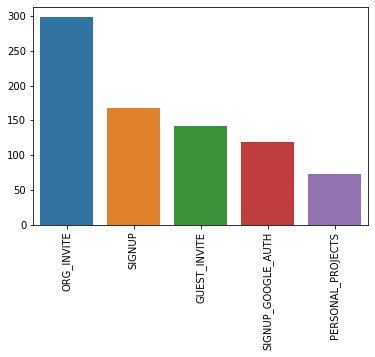

In [26]:
#plt.pie(creation_source,labels=["GUEST_INVITE","ORG_INVITE","PERSONAL_PROJECTS","SIGNUP","SIGNUP_GOOGLE_AUTH"])
labels=["GUEST_INVITE","ORG_INVITE","PERSONAL_PROJECTS","SIGNUP","SIGNUP_GOOGLE_AUTH"]
sns.barplot(x=creation_source.index,y=creation_source.values)#barplot
plt.xticks(x=creation_source.index,rotation ='vertical')#axis scale
plt.show()

From the above barplot the org_invite has the highest number followed by signup,guest_invite,signup_google_auth,personal_project so the creation source of org_invite is successfully

In [27]:
mailing_list=take_user["opted_in_to_mailing_list"].value_counts()
mailing_list.index

Int64Index([0, 1], dtype='int64')

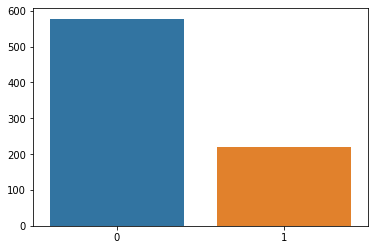

In [28]:
sns.barplot(x=mailing_list.index,y=mailing_list.values)

From the above barplot it clearly shows that the people are not in mail conversation where some people are their to buy.

In [29]:
marketing_drip=take_user["enabled_for_marketing_drip"].value_counts()
marketing_drip

0    649
1    150
Name: enabled_for_marketing_drip, dtype: int64

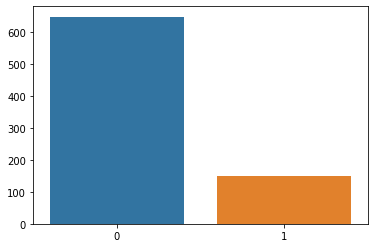

In [30]:
sns.barplot(x=marketing_drip.index,y=marketing_drip.values)

From the above barplot the company is not in the marketing drip good to see this

In [31]:
month=take_user["month"].value_counts()
month

5     96
1     85
4     84
3     80
12    65
6     62
2     60
8     59
11    58
10    57
9     51
7     42
Name: month, dtype: int64

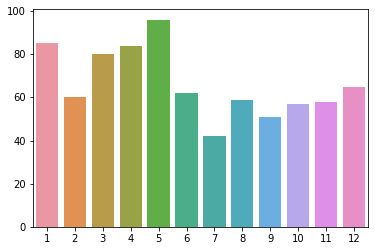

In [32]:
sns.barplot(x=month.index,y=month.values)

From the above barplot the each month of last three years is given and every April has the sales high and weak sales is on july

In [33]:
year=take_user.year.value_counts()
year

2013    384
2014    246
2012    169
Name: year, dtype: int64

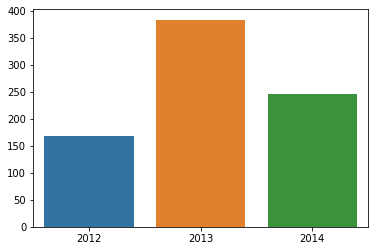

In [34]:
sns.barplot(x=year.index,y=year.values)

From the above barplot the year of 2013 the people are visited more and a drop of 700 is happen due to some reason maybe people get bored

In [35]:
#drop the Name and email feature before the model building
take_user.drop(["name","email"],axis=1,inplace=True)
take_user.head()

,user_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1.0,GUEST_INVITE,1,0,11,10803,2014,4
1,2.0,ORG_INVITE,0,0,1,316,2013,11
2,3.0,ORG_INVITE,0,0,94,1525,2013,3
3,10.0,ORG_INVITE,1,1,318,4143,2013,1
4,13.0,ORG_INVITE,0,0,254,11204,2014,3


All the above are from my analysis and now its time build the model of it and its a classification problem

# Model buliding

In [36]:
take_user.drop(["user_id","invited_by_user_id"],axis=1,inplace=True)#drop the unwanted feature on take_user

In [37]:
#encoding technique is one hot encoding
take_user=pd.get_dummies(take_user,drop_first=True)
take_user.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,year,month,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,2014,4,0,0,0,0
1,0,0,1,2013,11,1,0,0,0
2,0,0,94,2013,3,1,0,0,0
3,1,1,318,2013,1,1,0,0,0
4,0,0,254,2014,3,1,0,0,0


In [38]:
#seperate the independent and dependent variable
x=take_user.drop("enabled_for_marketing_drip",axis=1)#independent variable
y=take_user[["enabled_for_marketing_drip"]]#dependent or target variable

In [39]:
#checking the shape of it
x.shape , y.shape

((799, 8), (799, 1))

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)#train test split for fit and test different data

# Decision tree classifier

In [41]:
model=DecisionTreeClassifier()#model decisiontreeclassifier
model.fit(x_train,y_train)#fit the training data

DecisionTreeClassifier()

In [42]:
#testing the score of the model using test data
model.score(x_test,y_test)

0.7041666666666667

In [43]:
#using cross validation it take different sample and perform the model
cross_val_score(model,x,y,cv=5).mean()

0.7697091194968554

In [44]:
#confusion matrix
y_pred=model.predict(x_test)

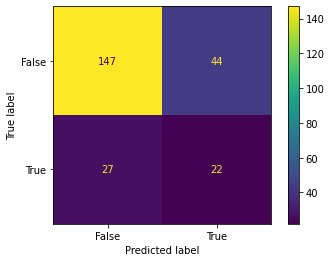

In [45]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Random forest classifier

In [46]:
model1=RandomForestClassifier()#randomforestclassifier
model1.fit(x_train,y_train)#fit the training data

RandomForestClassifier()

In [47]:
#testing the score of the model using test data
model1.score(x_test,y_test)

0.7833333333333333

In [48]:
#using cross validation it take different sample and perform the model
cross_val_score(model1,x,y,cv=5).mean()

0.8009512578616352

In [49]:
#confusion matrix
y_pre=model1.predict(x_test)

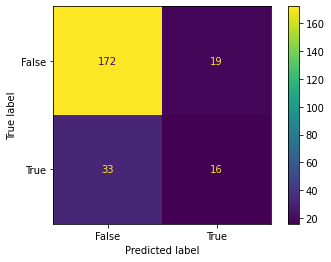

In [50]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Logistic regression

In [51]:
model2=LogisticRegression()#logistics regression model
model2.fit(x_train,y_train)#fit the training data

LogisticRegression()

In [52]:
#testing the score of the model using test data
model2.score(x_test,y_test)

0.7791666666666667

In [53]:
#using cross validation it take different sample and perform the model
cross_val_score(model2,x,y,cv=5).mean()

0.8072720125786164

For classification problem especially binary(0,1) classification problem the logistics regression perform well and hence it is proved

In [54]:
#confusion matrix
predicted=model2.predict(x_test)

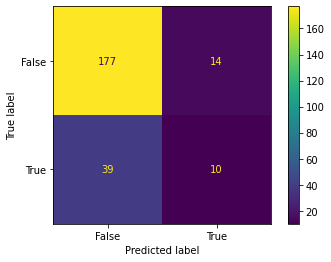

In [55]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Kmeans

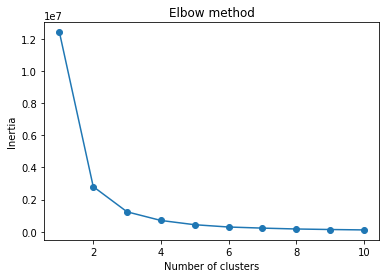

In [56]:
inertias=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(take_user)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [57]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(take_user)

KMeans(n_clusters=2)

# Conclusion

# The model of Logistic Regression gives us the best score of 85% overall and cross_validation is also used in it